In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import euclidean

import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
def masking(df,age,gender):
    mask1=(df['gender']==gender)
    mask2=(df['age']==age)
    data=df.loc[mask1]
    data=data.loc[mask2]
    data=data.groupby(['period','catm']).mean().reset_index()
    data_pivot=data.pivot(index='period',columns='catm',values='cgi').fillna(0)
    data_pivot_insert=pd.DataFrame(np.repeat(100,17)).T
    data_pivot_insert.columns=list(data_pivot.columns)
    data_pivot=pd.concat([data_pivot_insert, data_pivot])
    
    return data_pivot

In [4]:
index = pd.read_csv('index.csv')

In [5]:
index_pivot=masking(index,'all','all')

In [6]:
index_pivot

catm,가공식품,건강관리용품,기타화장품,기호식품,담배,바디/헤어용품,뷰티소품,빙과류,빵류,생활용품,신선식품,애완동물용품,유제품류,음료,제과류,주류,화장품
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
201901,111.339746,95.269774,64.738812,119.618911,137.812968,112.951938,77.486406,65.862772,114.126178,95.545997,111.179843,93.619433,97.078842,93.394540,95.694738,99.781459,99.300090
201902,85.948211,96.004969,63.694209,93.718549,116.691095,72.840273,77.010505,73.036750,87.555615,84.403468,90.991306,88.917950,85.779537,82.170599,95.640337,91.631786,90.156371
201903,97.356673,101.697367,72.241413,90.786446,137.011082,80.312990,93.682041,78.748609,105.762519,100.146668,100.101429,96.888773,102.441125,93.286217,109.138692,94.758097,85.177498
201904,93.475838,93.394606,123.527487,98.068383,135.090923,79.492982,90.062976,79.431826,103.901604,91.063603,94.742474,86.399565,97.155724,96.573297,96.827625,91.106307,77.823140
201905,92.400322,102.179720,181.459151,86.228044,153.063858,82.667693,95.626482,114.245464,99.157128,101.398321,94.648429,96.090523,98.003777,104.270495,97.098463,98.047972,95.400185
201906,94.375227,109.740056,127.326413,98.908471,154.148592,78.814956,94.474559,140.562686,98.207321,97.250154,92.610184,93.020611,97.814416,105.827425,93.553535,101.726671,82.028988
201907,94.170483,113.573761,99.304268,83.139068,156.239461,77.998369,109.907510,149.894912,95.536464,99.022151,88.488016,98.177070,97.192465,105.958808,85.448841,97.137298,78.571668
201908,106.200070,111.021101,74.764558,120.159039,157.833603,100.732628,96.997996,152.100616,94.913332,99.061678,97.474245,106.620919,101.055401,108.996431,90.251177,102.764978,75.857210
201909,98.452482,110.699554,84.930998,96.140770,155.707243,102.096472,85.232419,89.284083,88.566900,91.427106,97.977856,101.461473,94.779332,101.051727,90.780424,100.635705,78.375499


In [7]:
mask=(index.index >= 202001)
index_covid=index.loc[mask]

In [8]:
index_diff=index_pivot.diff()
index_diff.drop(0,inplace=True)
index_diff.drop(['기타화장품'],inplace=True,axis=1)

In [9]:
category=list(index_diff.columns)

Text(0.5, 1.0, 'catm추이')

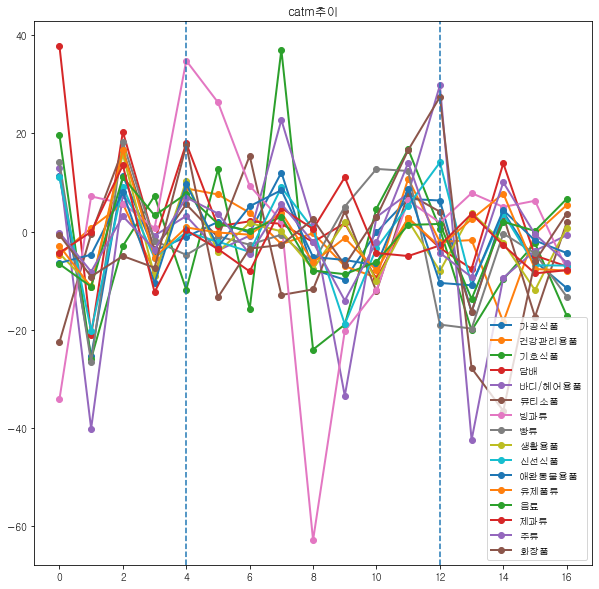

In [10]:
index_temp = index_diff.copy()
fig, ax = plt.subplots(1,1,figsize=(10,10))
for i in list(index_temp.columns):
    ax.plot(np.array(index_temp[[i]]),marker='o', linewidth=2,label=index_temp[[i]].columns[0])
ax.axvline(x=12,linestyle ='--') 
ax.axvline(x=4,linestyle ='--') 
ax.legend()
ax.set_title('catm추이')

In [11]:
index_diff_bf=index_diff[0:5]

In [12]:
index_diff_bf.reset_index(drop=True, inplace=True)

In [13]:
index_diff_af=index_diff[12:]

In [14]:
index_diff_af.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'bf_catm추이')

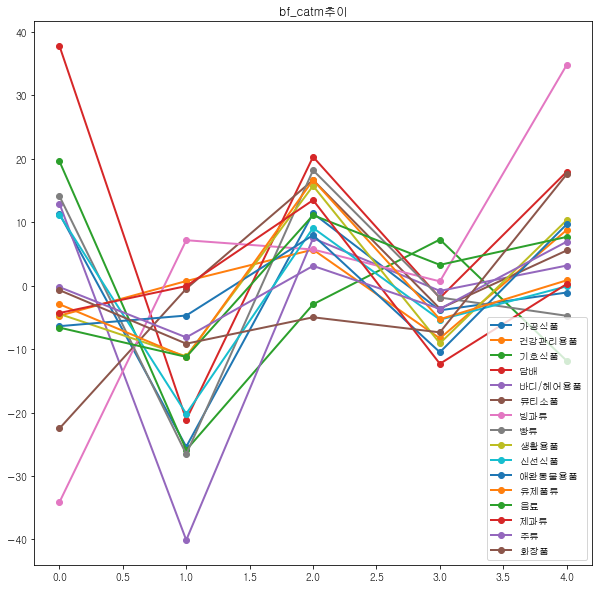

In [15]:
index_temp = index_diff_bf.copy()
fig, ax = plt.subplots(1,1,figsize=(10,10))
for i in list(index_temp.columns):
    ax.plot(np.array(index_temp[[i]]),marker='o', linewidth=2,label=index_temp[[i]].columns[0])
ax.legend()
ax.set_title('bf_catm추이')

Text(0.5, 1.0, 'af_catm추이')

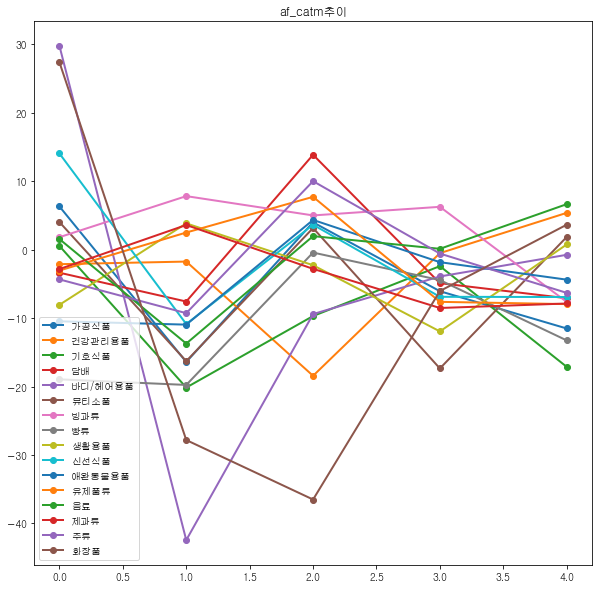

In [16]:
index_temp = index_diff_af.copy()
fig, ax = plt.subplots(1,1,figsize=(10,10))
for i in list(index_temp.columns):
    ax.plot(np.array(index_temp[[i]]),marker='o', linewidth=2,label=index_temp[[i]].columns[0])
ax.legend()
ax.set_title('af_catm추이')

In [17]:
euclidean_dis={}
for i in category: 
    try:
        a=euclidean(index_diff_bf[i],index_diff_af[i])
        euclidean_dis[i]=a
        print(i,a)
    except:
        print('error\n',i,'error\n')

가공식품 16.55840694794379
건강관리용품 25.82045609486702
기호식품 23.73536770189001
담배 50.55753722319349
바디/헤어용품 24.461356604648273
뷰티소품 36.59564821537736
빙과류 55.92195861775886
빵류 39.55804708115721
생활용품 25.718605079152535
신선식품 13.186373229466799
애완동물용품 18.4773161279497
유제품류 18.796815247264373
음료 12.925121976583624
제과류 19.00845377951404
주류 15.830560148324608
화장품 48.23320152583462


In [18]:
euclidean_dis

{'가공식품': 16.55840694794379,
 '건강관리용품': 25.82045609486702,
 '기호식품': 23.73536770189001,
 '담배': 50.55753722319349,
 '바디/헤어용품': 24.461356604648273,
 '뷰티소품': 36.59564821537736,
 '빙과류': 55.92195861775886,
 '빵류': 39.55804708115721,
 '생활용품': 25.718605079152535,
 '신선식품': 13.186373229466799,
 '애완동물용품': 18.4773161279497,
 '유제품류': 18.796815247264373,
 '음료': 12.925121976583624,
 '제과류': 19.00845377951404,
 '주류': 15.830560148324608,
 '화장품': 48.23320152583462}

In [19]:
dtw_dis={}
for i in category: 
    a=dtw.dtw(index_diff_bf[i],index_diff_af[i]).distance
    dtw_dis[i]=a
    print(i,a)


가공식품 57.54983158483455
건강관리용품 39.452307475176696
기호식품 64.84076790952528
담배 117.28563407592264
바디/헤어용품 65.36193643246773
뷰티소품 81.50774995438859
빙과류 95.59202126524342
빵류 94.51358946619264
생활용품 61.976611705679275
신선식품 43.84832657910559
애완동물용품 57.128746915474736
유제품류 53.31540673842754
음료 37.8795084157254
제과류 47.13263682854662
주류 42.221661834916006
화장품 121.13112319893685


Text(0.5, 1.0, '신선식품')

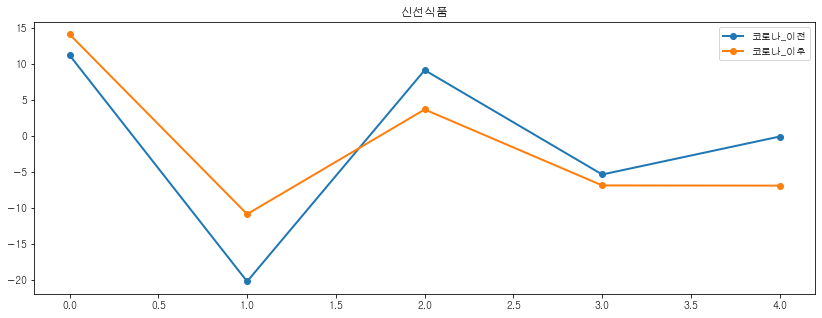

In [20]:
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(np.array(index_diff_bf['신선식품']),marker='o', linewidth=2,label='코로나_이전')
ax.plot(np.array(index_diff_af['신선식품']),marker='o', linewidth=2,label='코로나_이후')

ax.legend()
ax.set_title('신선식품')



Text(0.5, 1.0, '빙과류')

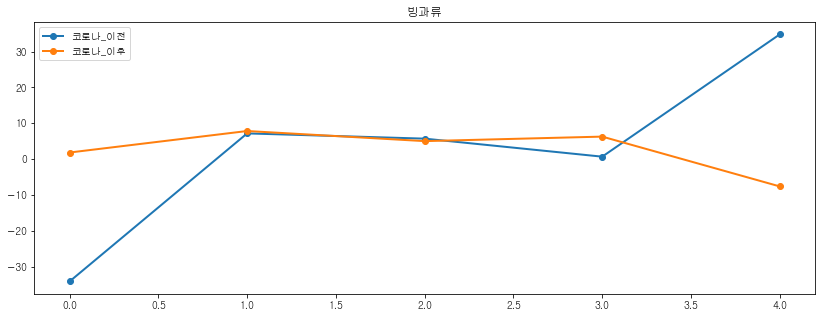

In [21]:
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(np.array(index_diff_bf['빙과류']),marker='o', linewidth=2,label='코로나_이전')
ax.plot(np.array(index_diff_af['빙과류']),marker='o', linewidth=2,label='코로나_이후')
ax.legend()
ax.set_title('빙과류')

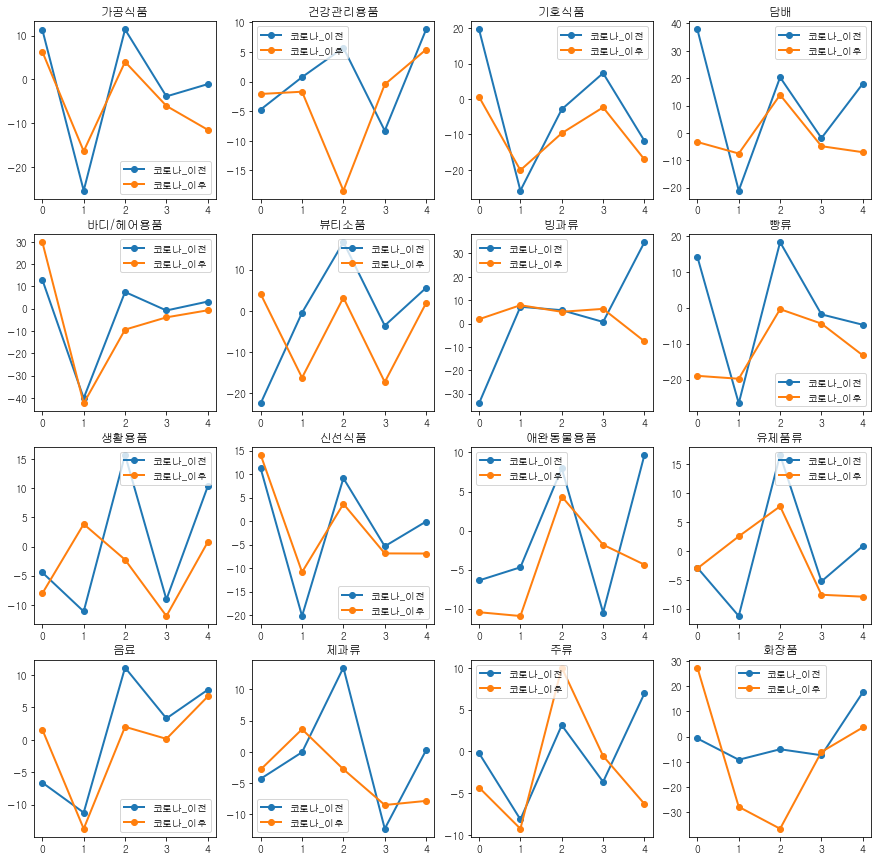

In [22]:

fig, ax = plt.subplots(4,4,figsize=(15,15))
ax = ax.ravel()

for i, j in zip(range(len(ax)), index_diff_bf.columns):
    ax[i].plot(np.array(index_diff_bf[j]),marker='o', linewidth=2,label='코로나_이전')
    ax[i].plot(np.array(index_diff_af[j]),marker='o', linewidth=2,label='코로나_이후')
    ax[i].legend()

    ax[i].set_title(j)

201812를 100으로 놓는게 맞는가?

아니라면 2019 2월, 2020 2월 부터 봐야하나?

In [23]:
index_pivot_bf=index_pivot[1:6]
index_pivot_af=index_pivot[13:]

In [24]:
index_pivot_bf.reset_index(drop=True, inplace=True)

In [25]:
index_pivot_af.reset_index(drop=True, inplace=True)

In [26]:
euclidean_dis2={}
for i in category: 
    a=euclidean(index_pivot_bf[i],index_pivot_af[i])
    euclidean_dis2[i]=a
    print(i,a)


가공식품 26.568059984498046
건강관리용품 27.858779355844746
기호식품 57.97262555426308
담배 34.66553029323413
바디/헤어용품 46.45677538959423
뷰티소품 51.989612696521455
빙과류 37.74999065598926
빵류 56.051993094053095
생활용품 49.59891119669641
신선식품 32.46176703277912
애완동물용품 31.689808130917353
유제품류 24.510262147264978
음료 32.84101080134275
제과류 33.67271372023543
주류 13.606607822901651
화장품 64.13097682800019


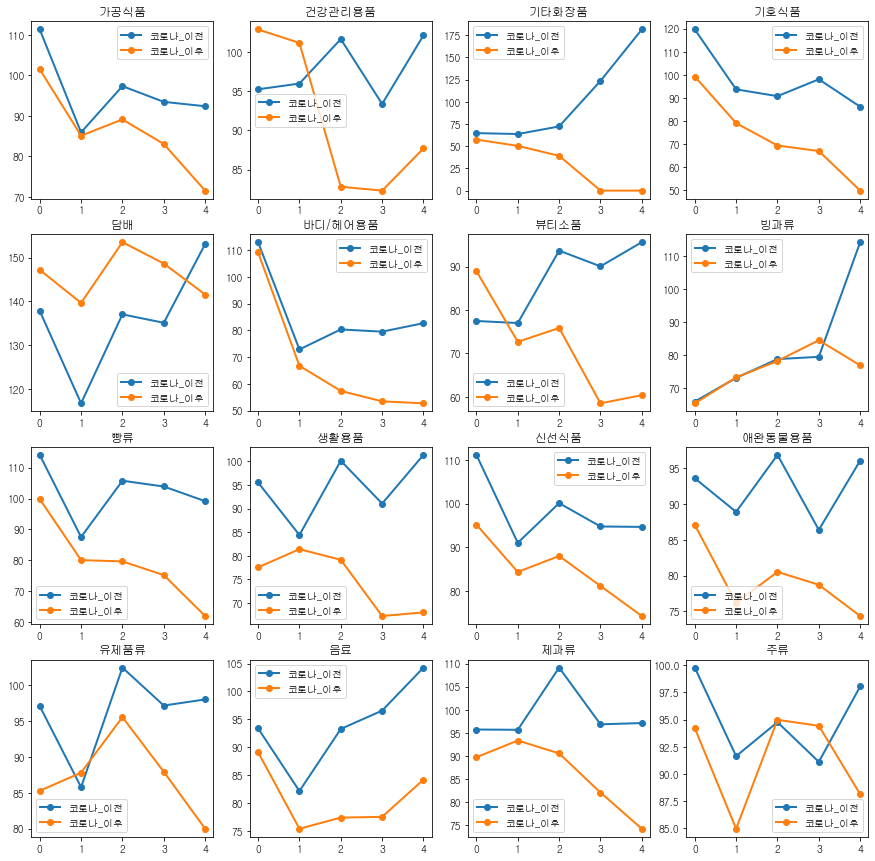

In [27]:

fig, ax = plt.subplots(4,4,figsize=(15,15))
ax = ax.ravel()

for i, j in zip(range(len(ax)), index_pivot_bf.columns):
    ax[i].plot(np.array(index_pivot_bf[j]),marker='o', linewidth=2,label='코로나_이전')
    ax[i].plot(np.array(index_pivot_af[j]),marker='o', linewidth=2,label='코로나_이후')
    ax[i].legend()

    ax[i].set_title(j)

In [28]:
index_2019=index_pivot[1:13]

In [29]:
mean=np.mean(index_2019)

In [30]:
type(mean)

pandas.core.series.Series

In [31]:
pd.DataFrame(mean).sort_values(by=[0], axis=0)

,0
catm,
화장품,83.311230
바디/헤어용품,83.961847
뷰티소품,89.337512
신선식품,92.019961
생활용품,93.471340
빙과류,94.402718
유제품류,94.887891
애완동물용품,95.271758
기호식품,95.383099


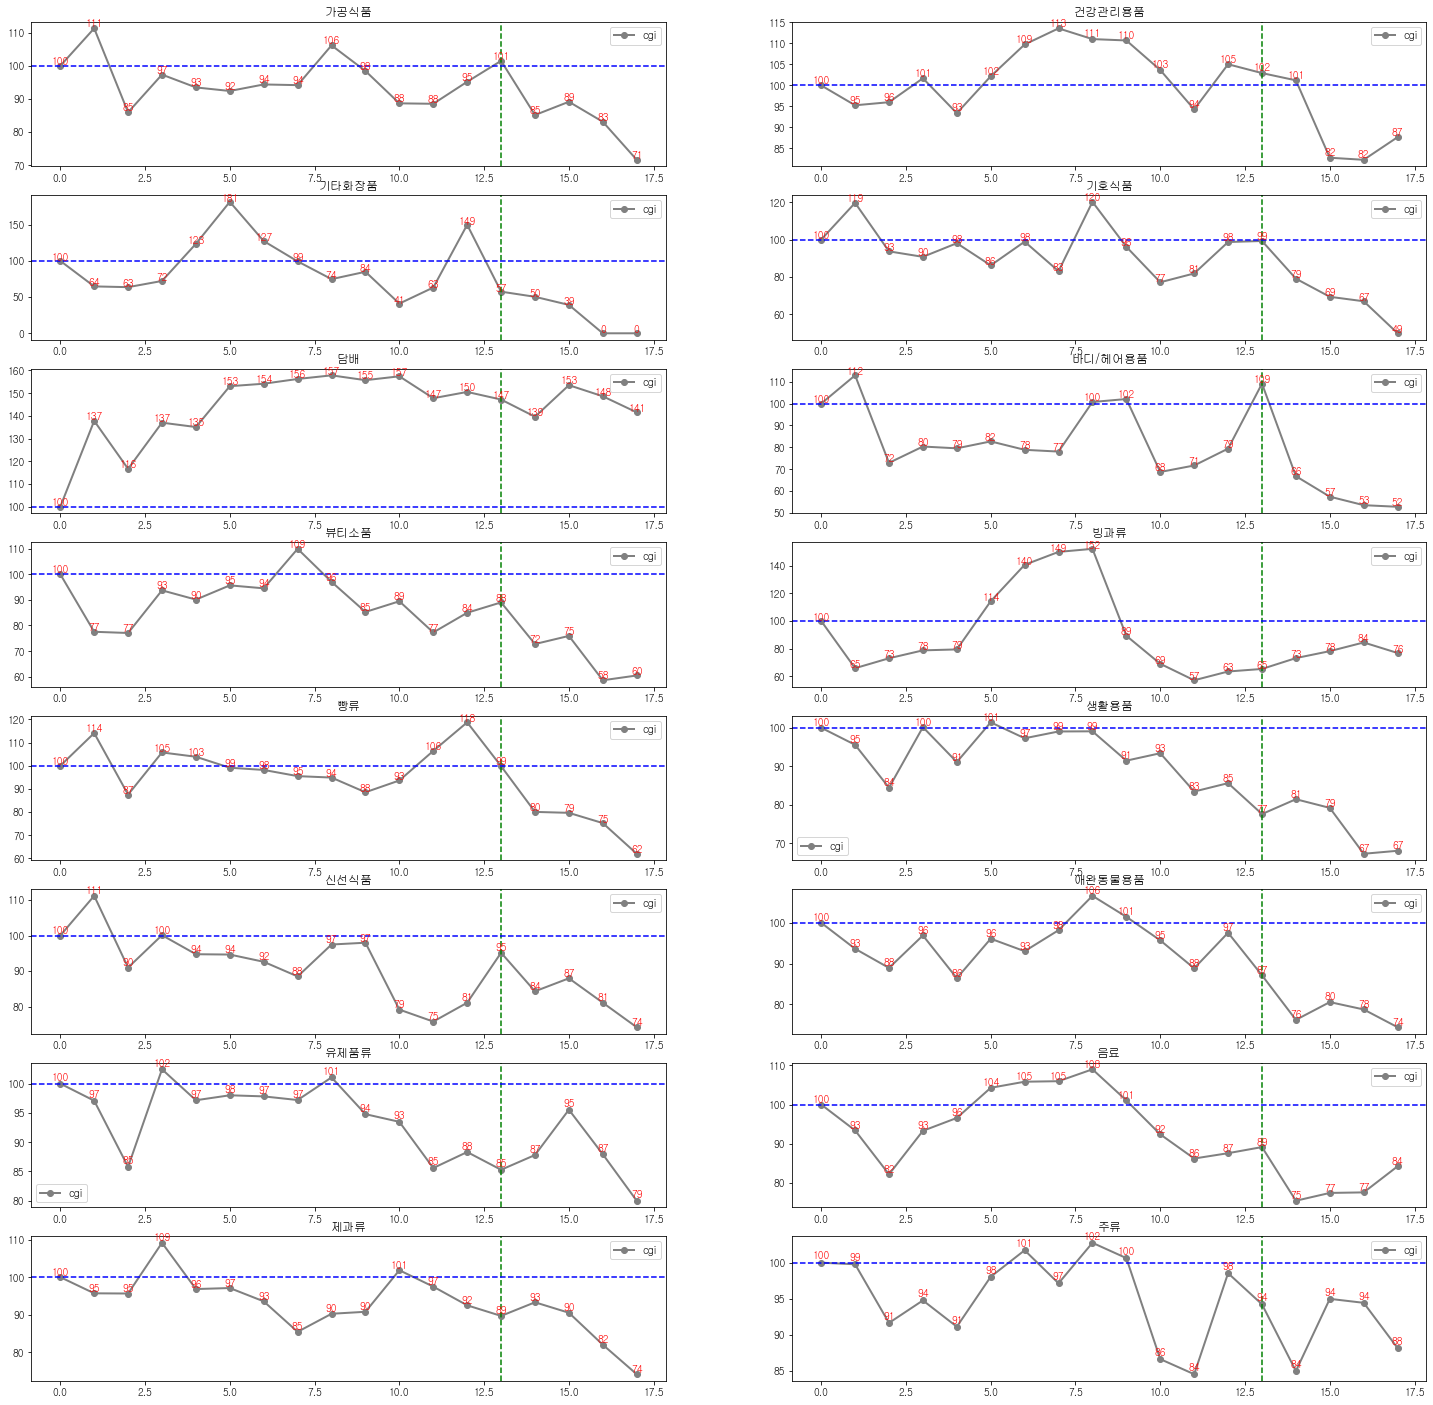

In [32]:
# for i in list(index_pivot.columns):
#     fig, ax = plt.subplots(1,1,figsize=(14,5))
#     ax.plot(np.array(index_pivot[i]),marker='o', linewidth=2,label='산업',color='grey')
#     ax.axvline(x=13,linestyle ='--',color='g')
#     ax.axhline(y=100,linestyle ='--',color='b')
    
#     ax.legend()
#     ax.set_title(i)
#     for i, v in enumerate(np.array(index_pivot[i])):
#         ax.text(i, v+0.5, "%d" %v, ha="center", fontsize=15,color='r')

fig, ax = plt.subplots(8,2,figsize=(25,25))
ax = ax.ravel()

for i, j in zip(range(len(ax)), index_pivot_bf.columns):
    ax[i].plot(np.array(index_pivot[j]),marker='o', linewidth=2,label='cgi',color='grey')
    ax[i].axvline(x=13,linestyle ='--',color='g')
    ax[i].axhline(y=100,linestyle ='--',color='b')
    ax[i].legend()

    ax[i].set_title(j)
    for k, v in enumerate(np.array(index_pivot[j])):
        ax[i].text(k, v+0.5, "%d" %v, ha="center", fontsize=10,color='r')
    

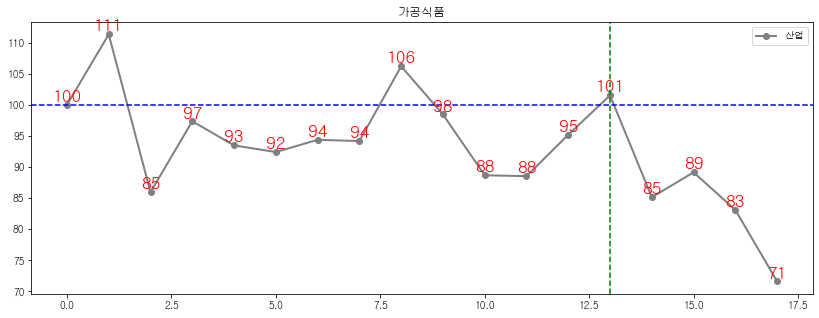

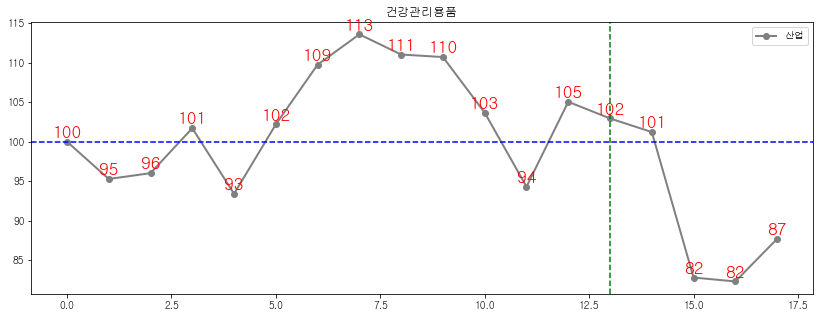

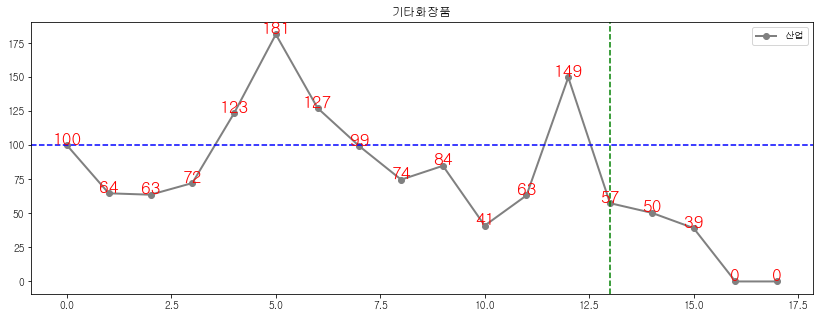

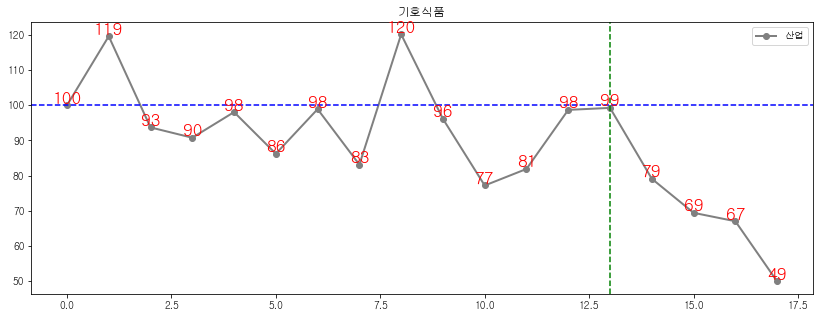

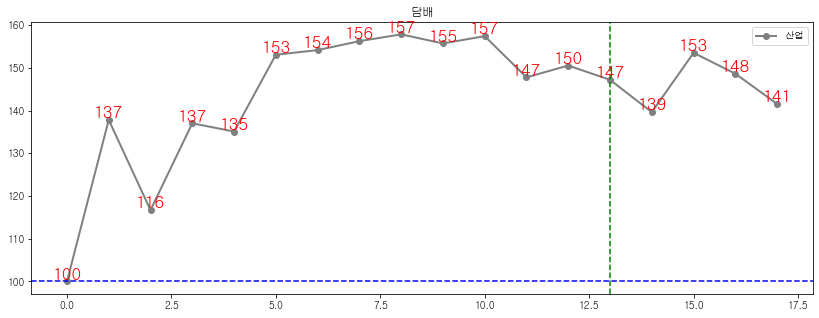

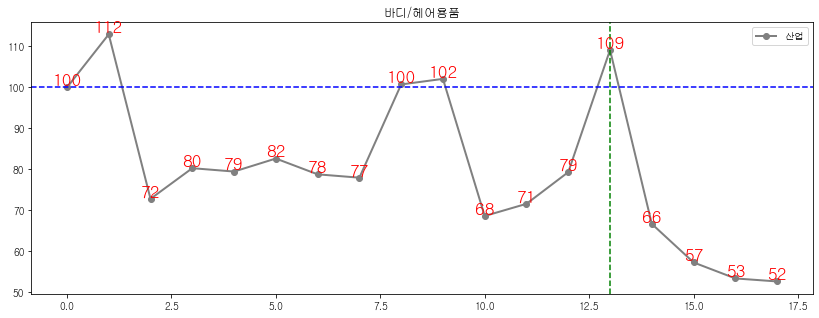

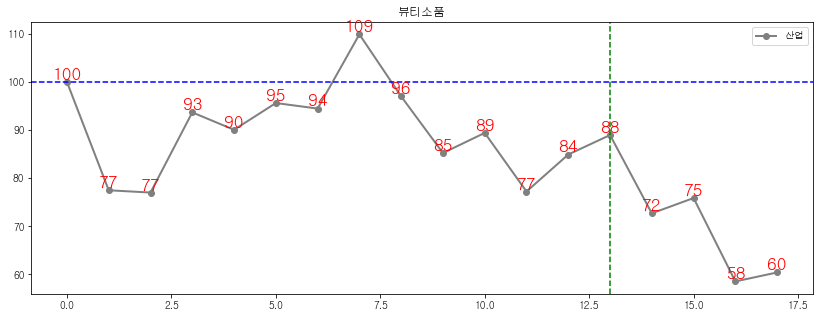

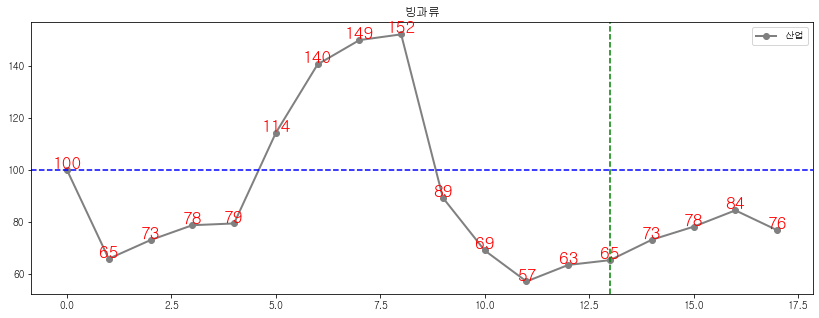

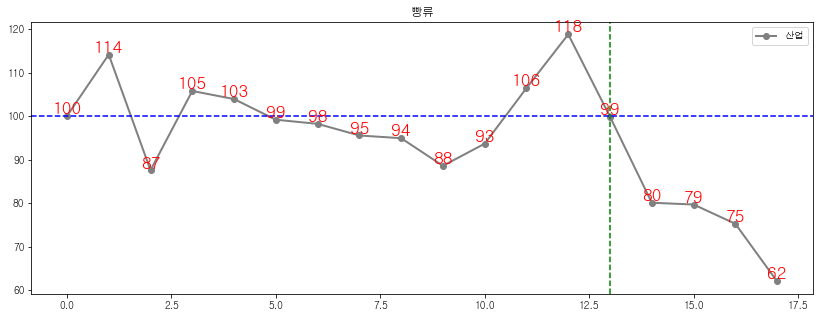

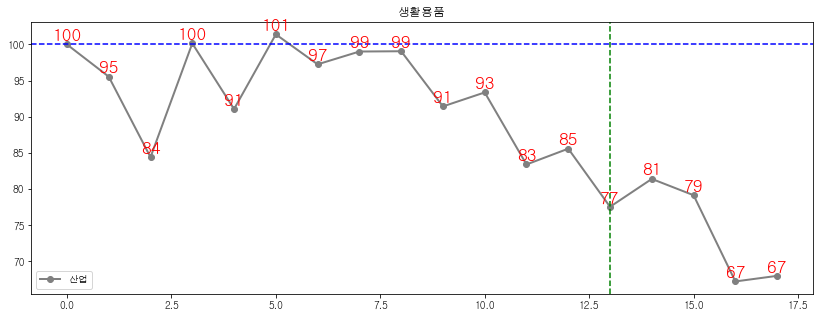

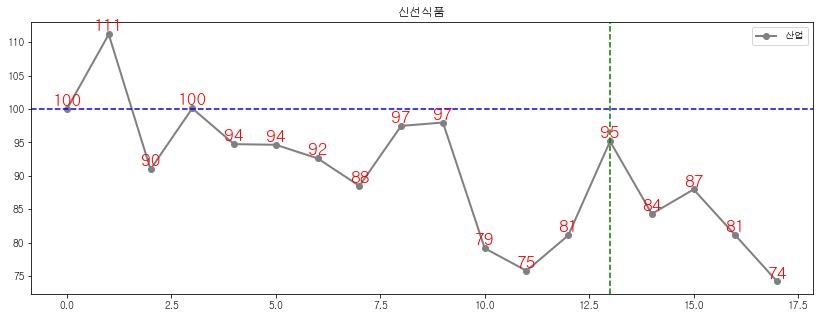

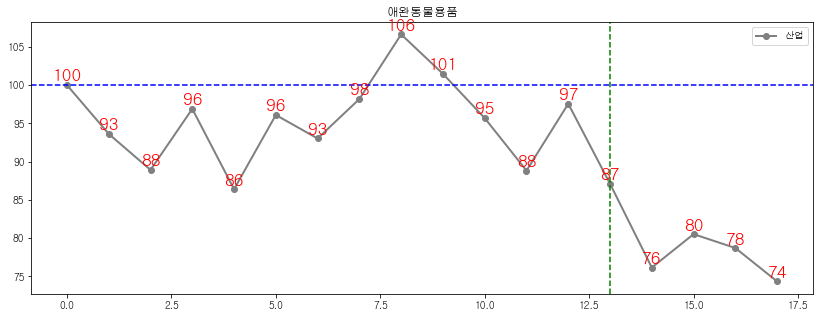

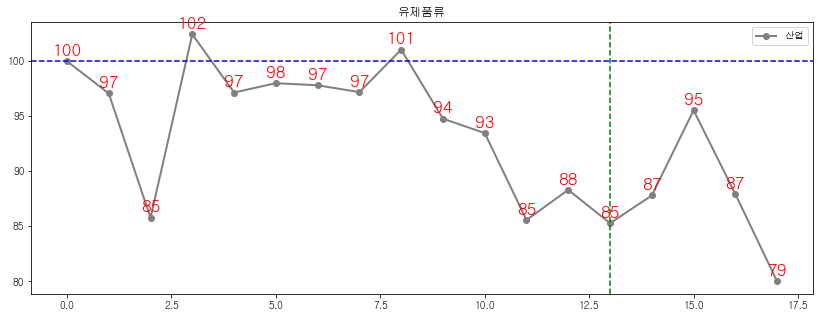

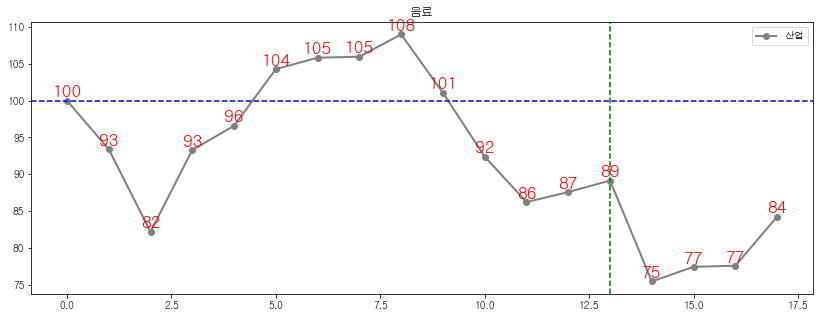

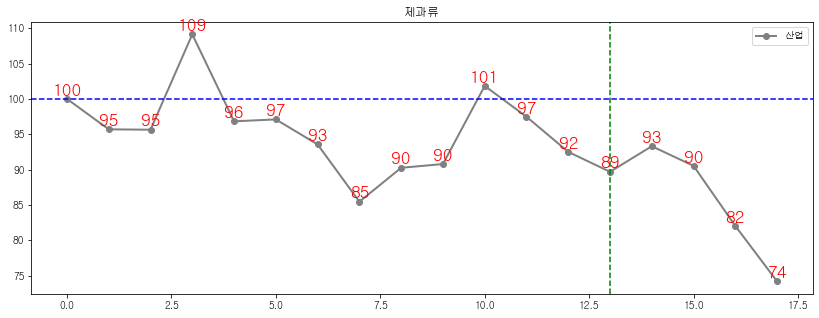

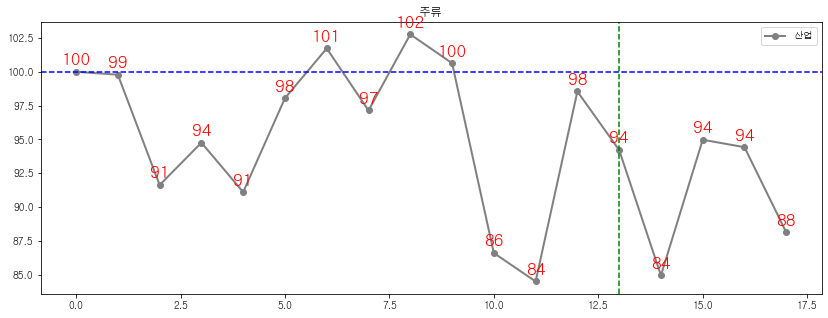

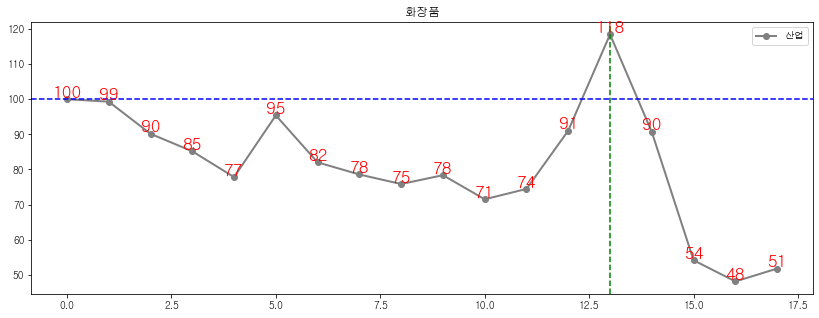

In [33]:
for i in list(index_pivot.columns):
    fig, ax = plt.subplots(1,1,figsize=(14,5))
    ax.plot(np.array(index_pivot[i]),marker='o', linewidth=2,label='산업',color='grey')
    ax.axvline(x=13,linestyle ='--',color='g')
    ax.axhline(y=100,linestyle ='--',color='b')
    ax.legend()
    ax.set_title(i)
    for i, v in enumerate(np.array(index_pivot[i])):
        ax.text(i, v+0.5, "%d" %v, ha="center", fontsize=17,color='r')
    


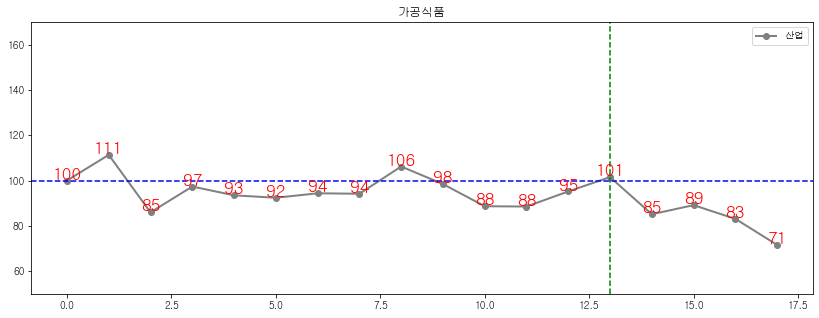

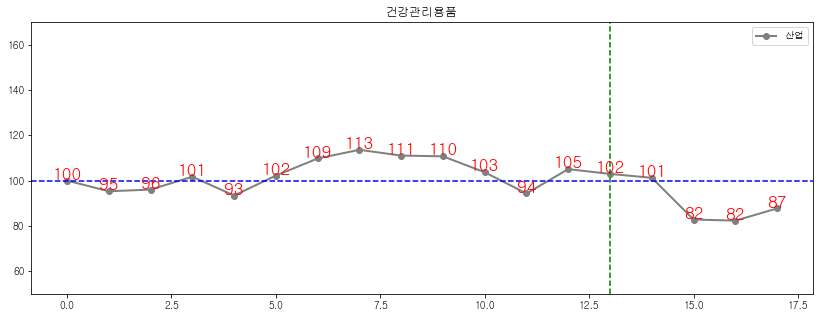

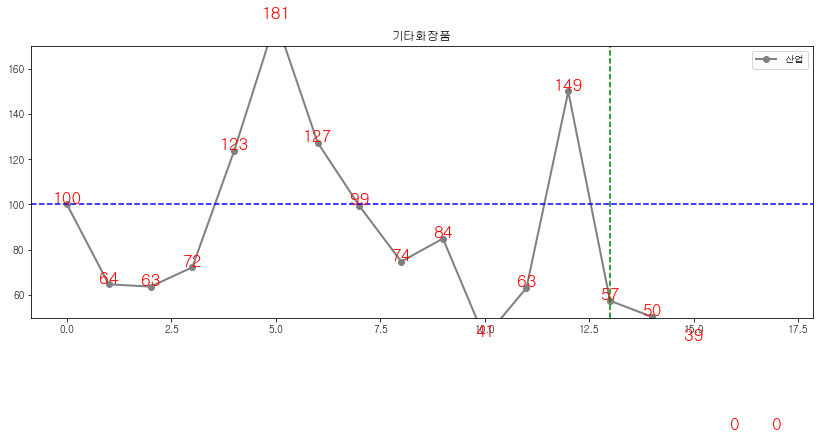

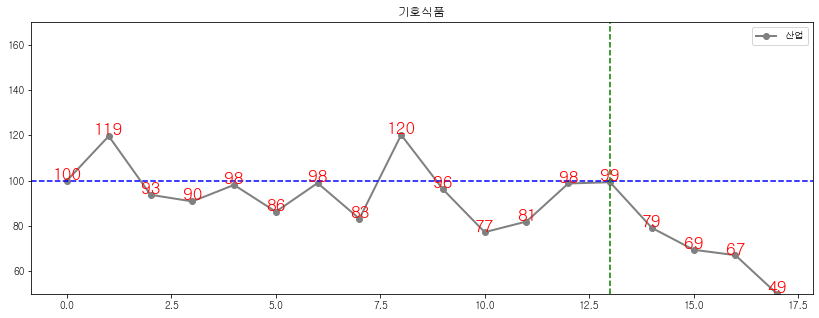

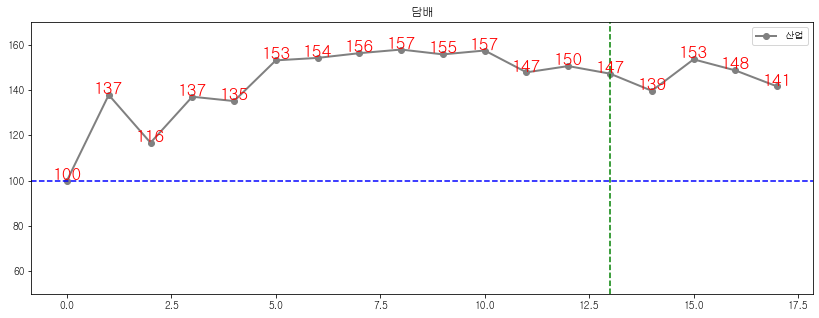

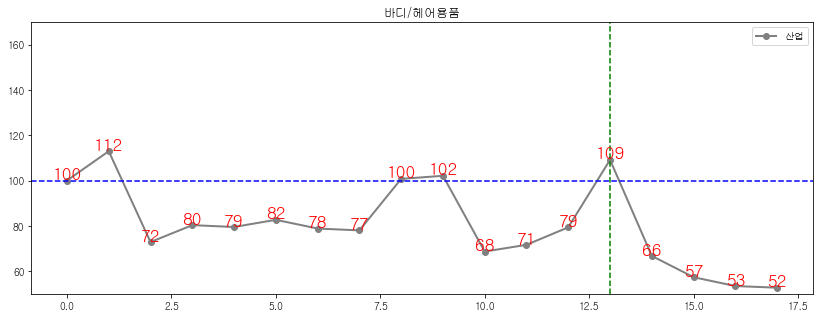

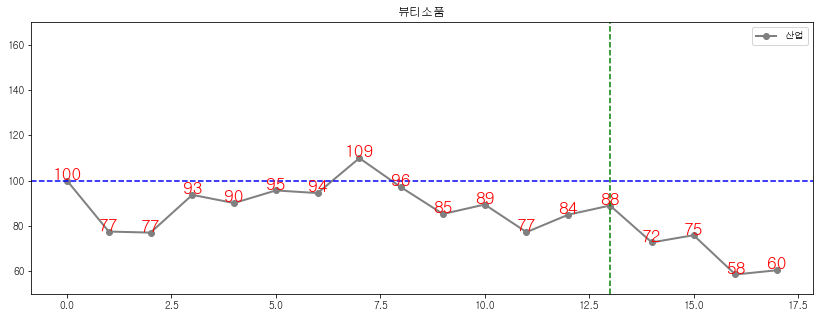

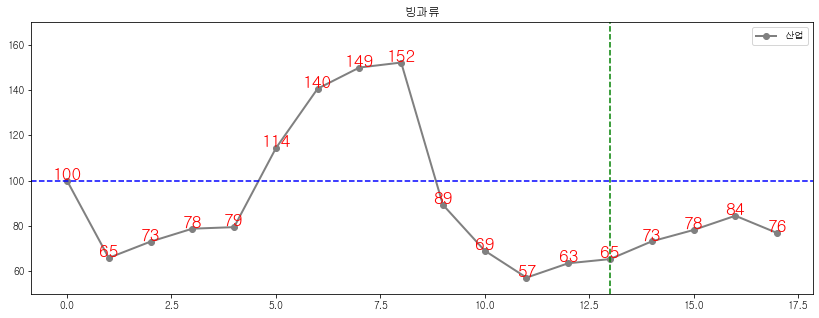

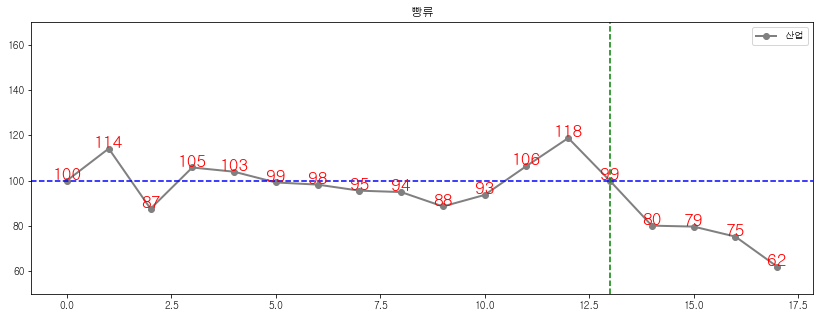

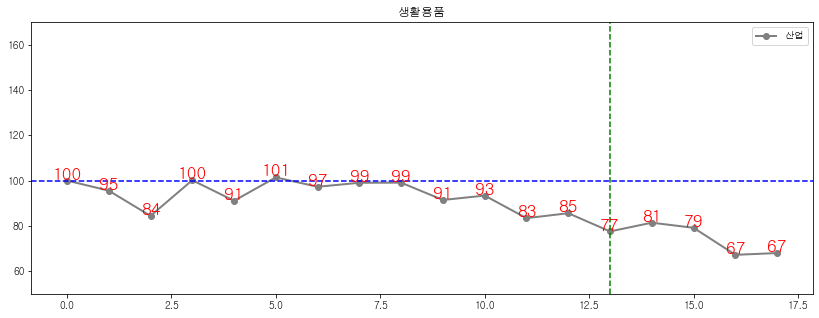

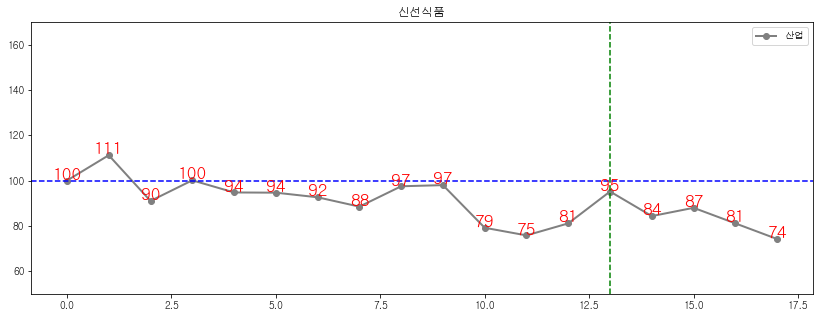

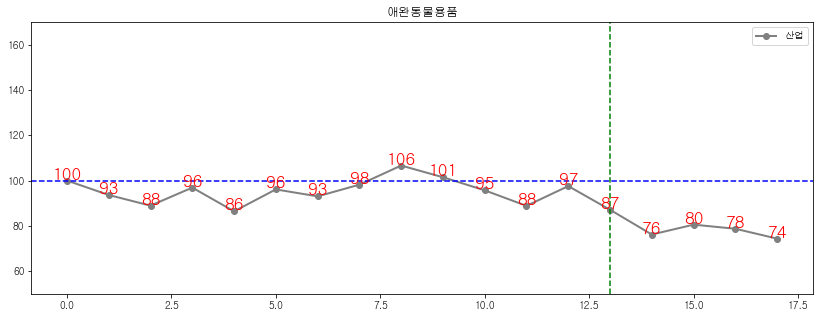

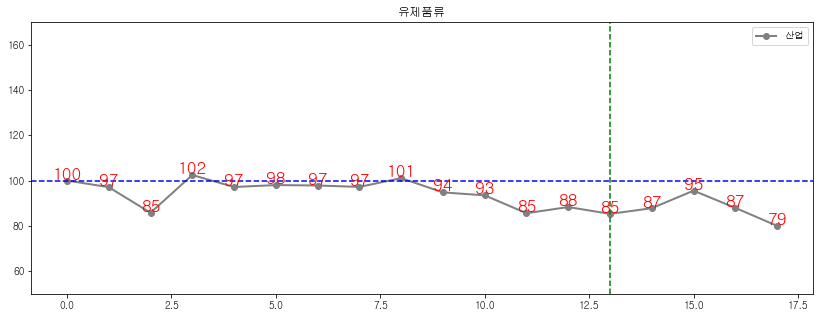

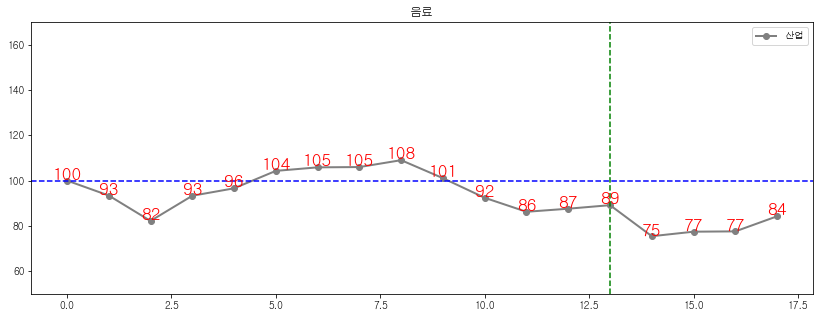

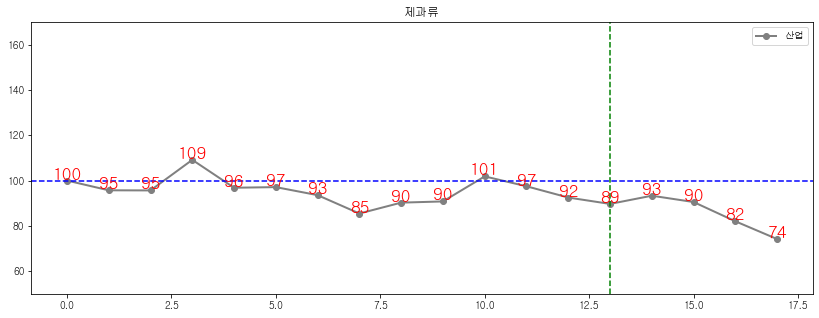

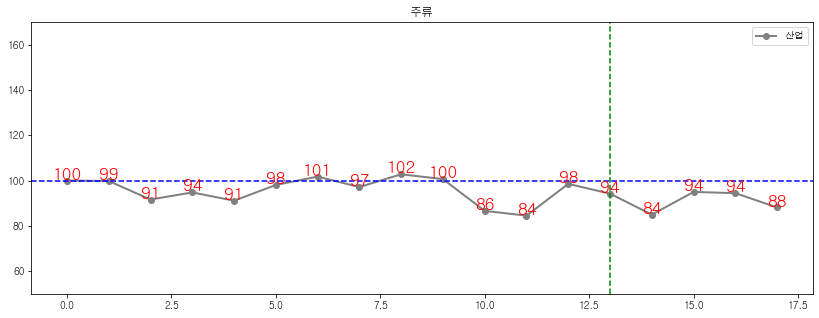

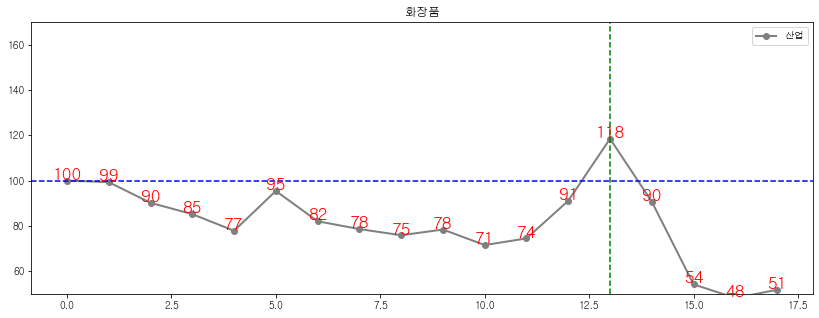

In [34]:
for i in list(index_pivot.columns):
    fig, ax = plt.subplots(1,1,figsize=(14,5))
    plt.ylim(50,170)
    ax.plot(np.array(index_pivot[i]),marker='o', linewidth=2,label='산업',color='grey')
    ax.axvline(x=13,linestyle ='--',color='g')
    ax.axhline(y=100,linestyle ='--',color='b')
    ax.legend()
    ax.set_title(i)
    for i, v in enumerate(np.array(index_pivot[i])):
        ax.text(i, v+0.5, "%d" %v, ha="center", fontsize=17,color='r')
    


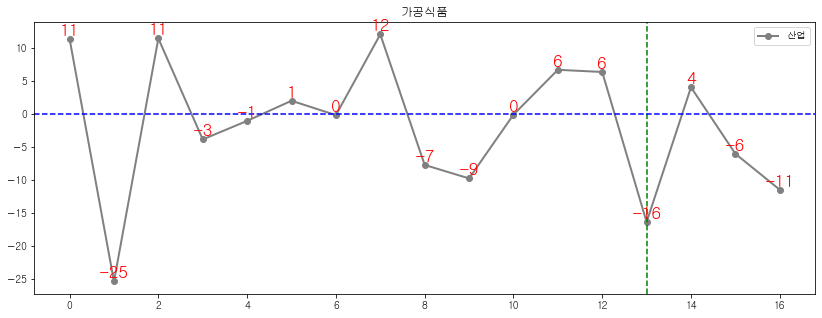

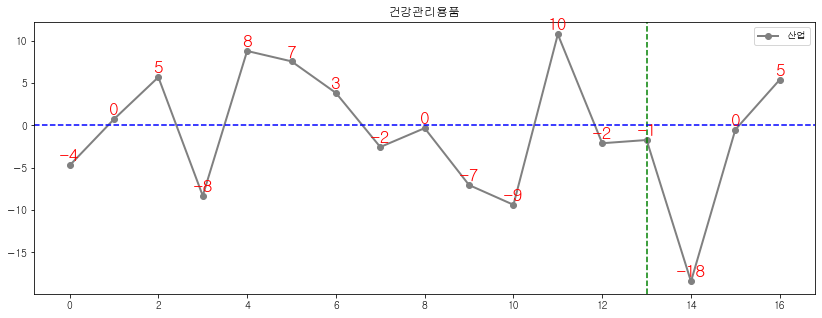

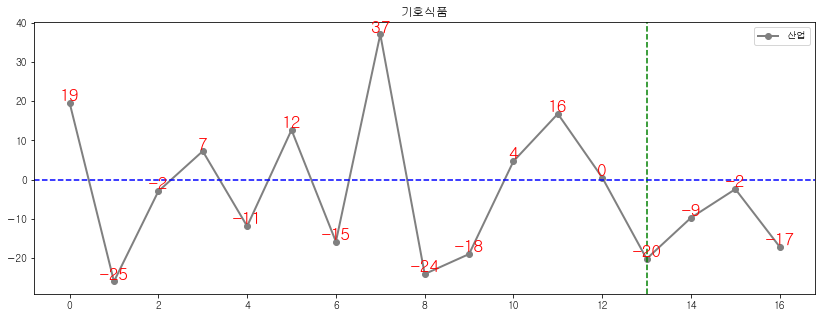

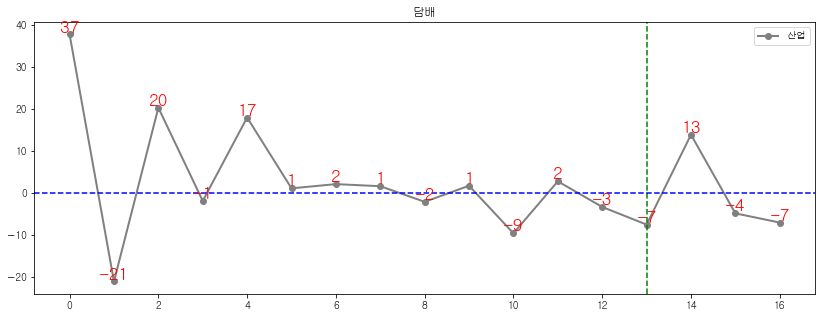

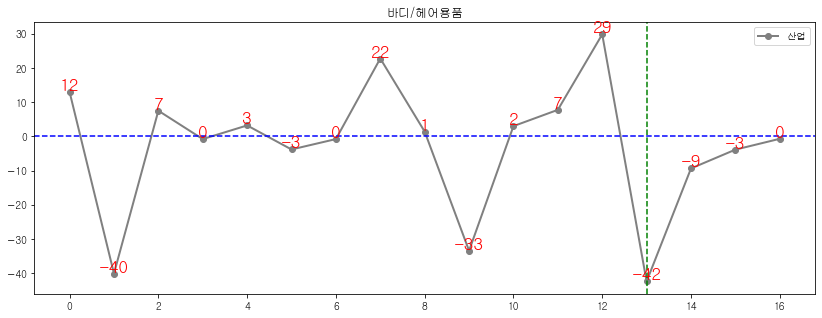

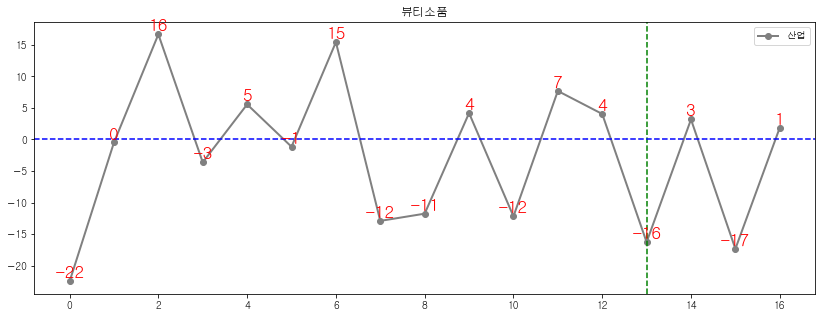

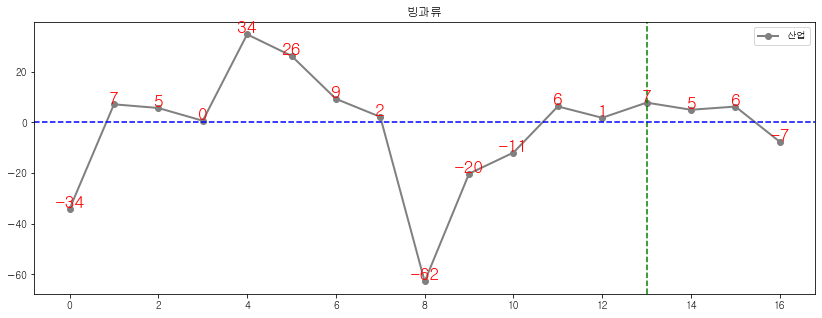

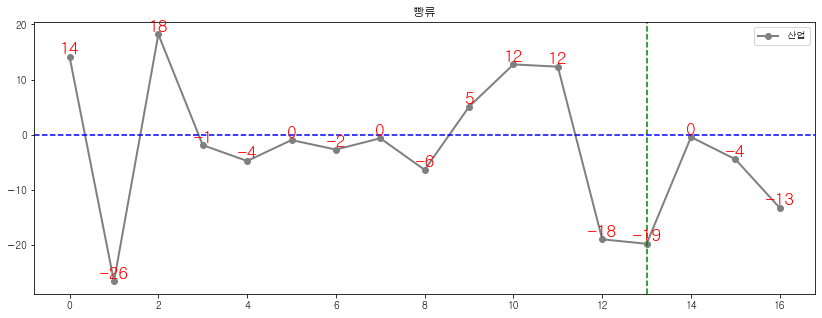

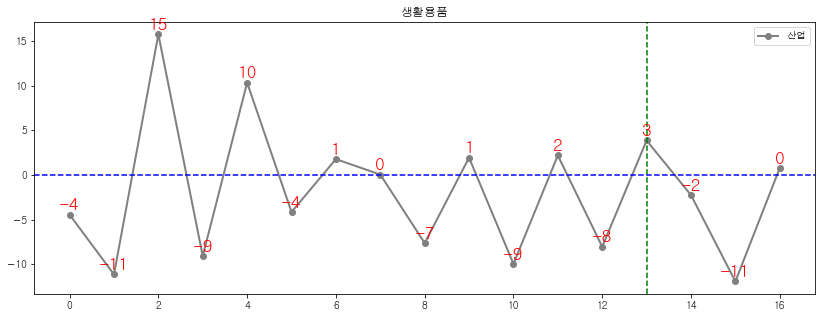

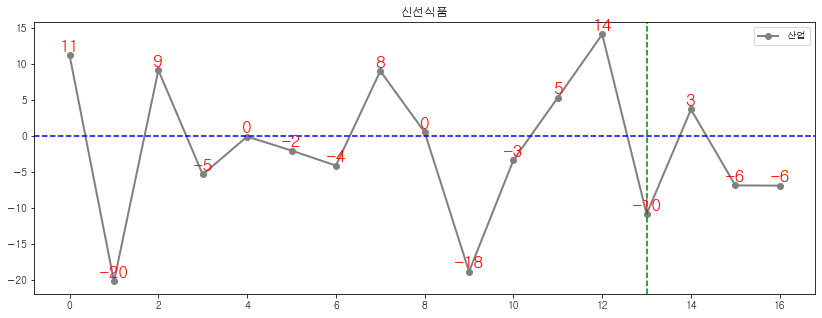

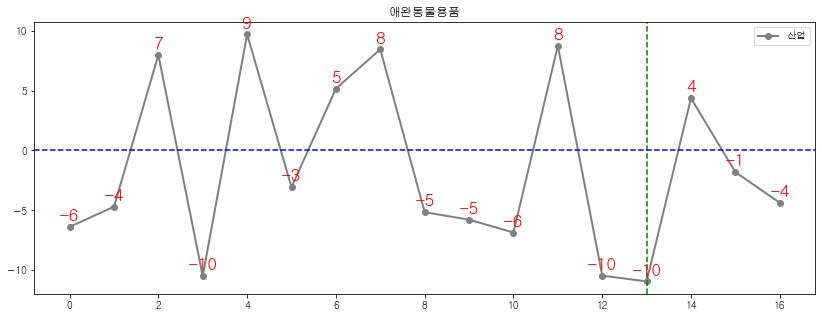

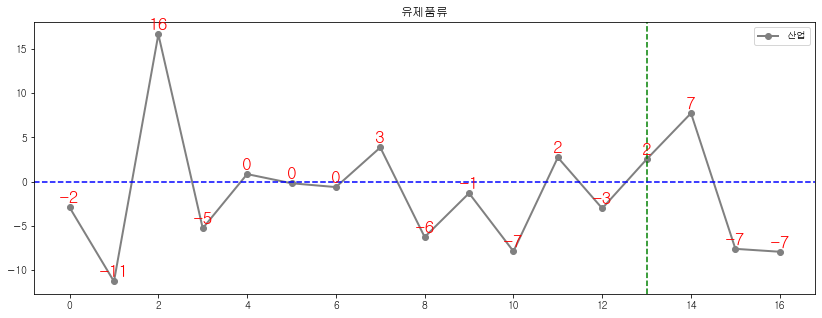

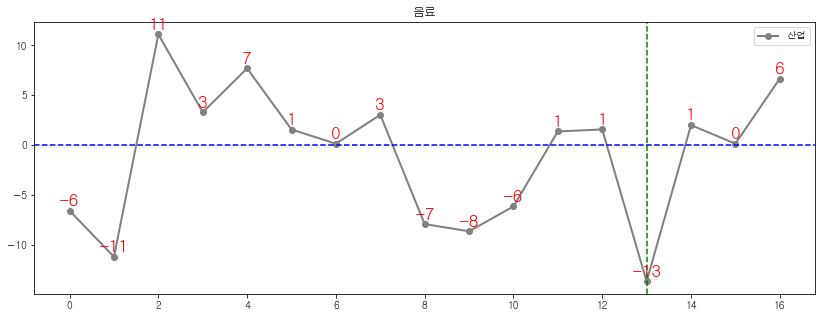

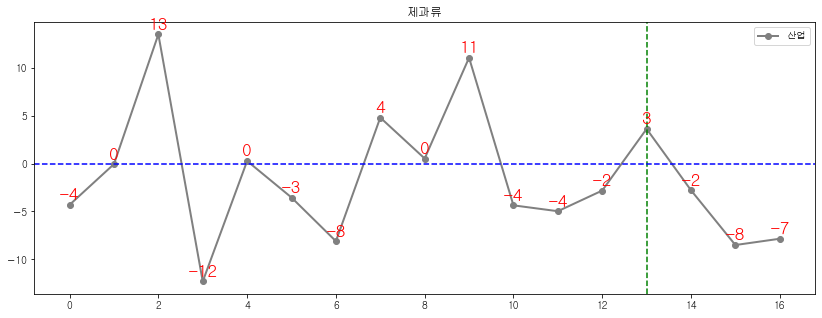

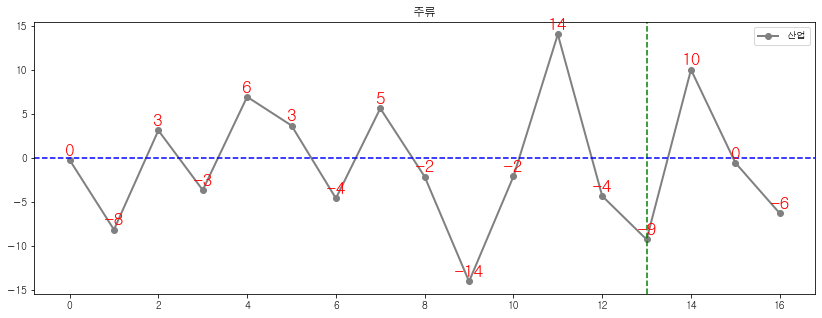

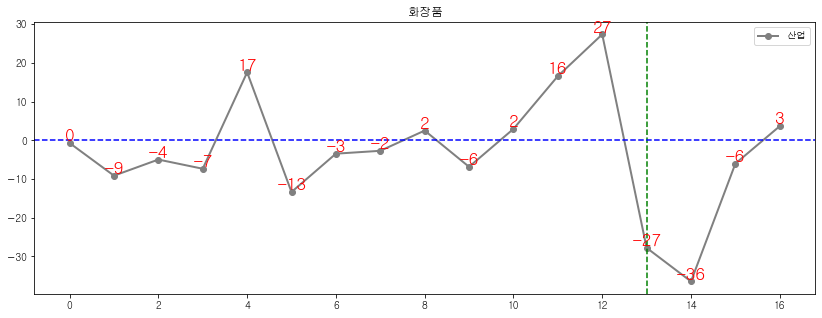

In [35]:
for i in list(index_pivot.columns):
    if i != '기타화장품':
        fig, ax = plt.subplots(1,1,figsize=(14,5))
        ax.plot(np.array(index_diff[i]),marker='o', linewidth=2,label='산업',color='grey')
        ax.axvline(x=13,linestyle ='--',color='g')
        ax.axhline(y=0,linestyle ='--',color='b')
        ax.legend()
        ax.set_title(i)
        for i, v in enumerate(np.array(index_diff[i])):
            ax.text(i, v+0.5, "%d" %v, ha="center", fontsize=17,color='r')


In [36]:
def masking(df,age,gender):
    mask1 = (df['sigungu'] == "all")
    mask2 = (df['gender'] == gender)
    mask3 = (df['age'].isin(age))
    
    df1 = df.loc[mask1]
    df2 = df1.loc[mask2]
    df3 = df2.loc[mask3]
    
    df3 = df3.groupby(['period','catm']).mean().reset_index()
    data_pivot = df3.pivot(index='period',columns='catm',values='cgi').fillna(0)
    data_pivot_insert = pd.DataFrame(np.repeat(100,17)).T
    data_pivot_insert.columns = list(data_pivot.columns)
    data_pivot = pd.concat([data_pivot_insert, data_pivot])
    
    return data_pivot

In [37]:
index_data=pd.read_csv('index.csv')

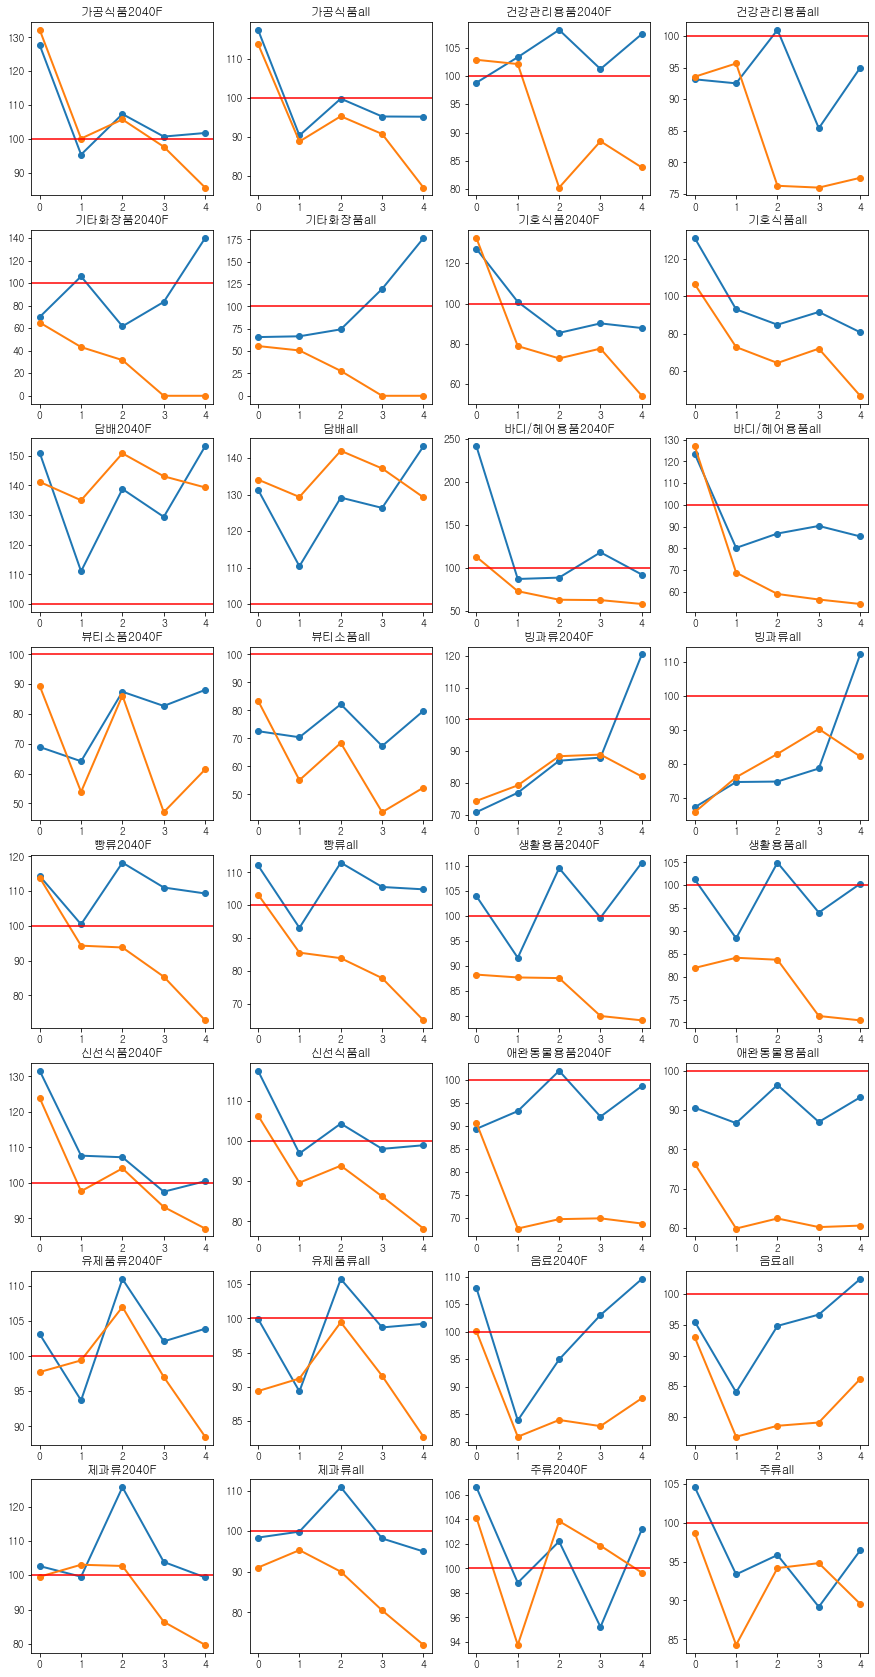

In [38]:
index_summarise = masking(index_data, age=['20', '30', '40'], gender='M')

index_pivot_bf = index_summarise.iloc[1:6, :]
index_pivot_af = index_summarise.iloc[-5:, :]

index_summarise1 = masking(index_data, age=['all'], gender='all')

index_pivot_bf1 = index_summarise1.iloc[1:6, :]
index_pivot_af1 = index_summarise1.iloc[-5:, :]

fig, ax = plt.subplots(8, 4, figsize=(15, 30))
ax = ax.ravel()

for i in range(len(ax)):
    if i % 2 == 0:
        ax[i].plot(np.array(index_pivot_bf.iloc[:, int(i/2)]),marker='o', linewidth=2,label='before')
        ax[i].plot(np.array(index_pivot_af.iloc[:, int(i/2)]),marker='o', linewidth=2,label='after')
        ax[i].axhline(y=100, color='r')
        ax[i].set_title(index_pivot_bf.columns[int(i/2)] + "2040F")
        
    if i % 2 == 1:
        ax[i].plot(np.array(index_pivot_bf1.iloc[:, int((i-1)/2)]),marker='o', linewidth=2,label='before')
        ax[i].plot(np.array(index_pivot_af1.iloc[:, int((i-1)/2)]),marker='o', linewidth=2,label='after')
        ax[i].axhline(y=100, color='r')
        ax[i].set_title(index_pivot_bf1.columns[int((i-1)/2)] + "all")
